In [ ]:
! pip install kwcoco

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
データセットの枚数：1410 枚
(700, 467)
(428, 320)
(405, 540)
(168, 299)
(183, 275)


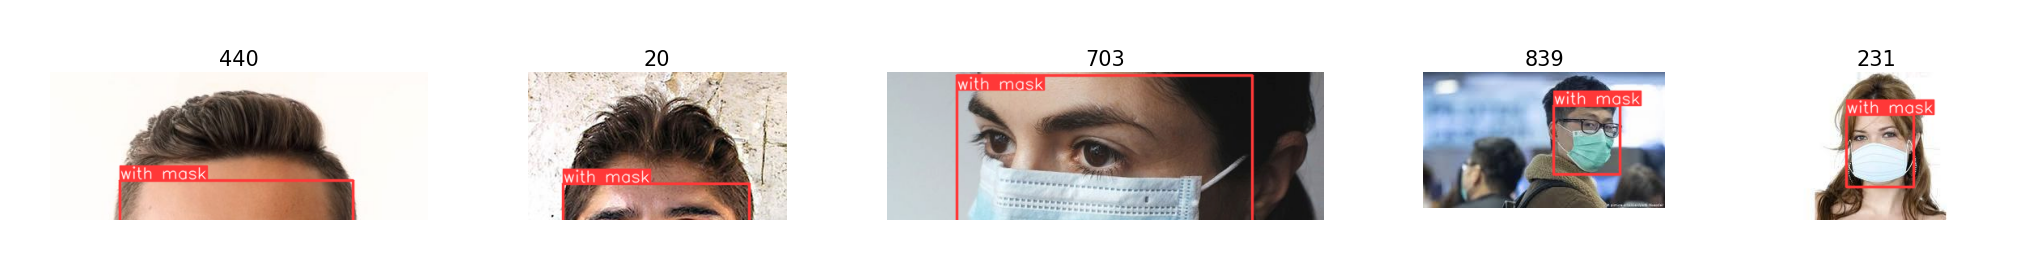

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
from pathlib import Path
from ultralytics.yolo.engine.results import Results

import utils

config_path = Path("./dataset/mask_yolo_dataset/config.yaml")
yolo_data_train = utils.YOLO_dataset(str(config_path), "train")

print(f"データセットの枚数：{len(yolo_data_train)} 枚")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        masks     = yolo_data["masks"],
        keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)